<a href="https://colab.research.google.com/github/phdkiran/mkmoney/blob/master/Week3_credit_fraud.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

```python
from google.colab import files
files.upload()
!pip install -q kaggle
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!kaggle competitions download -c ieee-fraud-detection
!unzip '*zip'
```

In [ ]:
import os
from google.colab import drive, html, auth, files
drive.mount('/content/gdrive')
os.chdir('/content/gdrive/My Drive/kaggle/ieee-fraud')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [85]:
import pandas as pd
# df = pd.read_pickle('./train_transaction.pkl')
df = pd.read_csv('./cc/train_transaction.csv')

In [89]:
df.shape
df.fillna(-99, inplace=True)

In [ ]:
!ls

data	     reduce_memory.py	 train_transaction.pkl
__pycache__  train_identity.pkl  Week3_credit_fraud.ipynb


In [4]:
df.memory_usage(deep=True).sum()

2226288670

In [5]:

from reduce_memory import reduce_mem_usage
df = reduce_mem_usage(df)


Memory usage of dataframe is 1775.15 MB
Memory usage after optimization is: 487.16 MB
Decreased by 72.6%


In [45]:
# df.to_pickle('./train_transaction.pkl')
# df_ = pd.read_pickle('./train_identity.pkl')
# !ls
df=pd.read_pickle('./train_transaction.pkl')

# df.columns
df_ = pd.read_csv('./data/train_identity.csv')
df_.head()
df_ = reduce_mem_usage(df_)
df_.to_pickle('./train_identity.pkl')

# df_.dtypes
!ls data/ -ltr
!ls -ltr

In [128]:
df.head()

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,addr1,addr2,dist1,dist2,P_emaildomain,R_emaildomain,C1,C2,C3,C4,C5,C6,C7,C8,...,V315,V316,V317,V318,V319,V320,V321,V322,V323,V324,V325,V326,V327,V328,V329,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339
0,2987000,0,86400,68.5,W,13926,-99.0,150.0,discover,142.0,credit,315.0,87.0,19.0,-99.0,-99,-99,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,117.0,0.0,0.0,0.0,0.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0
1,2987001,0,86401,29.0,W,2755,404.0,150.0,mastercard,102.0,credit,325.0,87.0,-99.0,-99.0,gmail.com,-99,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0
2,2987002,0,86469,59.0,W,4663,490.0,150.0,visa,166.0,debit,330.0,87.0,287.0,-99.0,outlook.com,-99,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0
3,2987003,0,86499,50.0,W,18132,567.0,150.0,mastercard,117.0,debit,476.0,87.0,-99.0,-99.0,yahoo.com,-99,2.0,5.0,0.0,0.0,0.0,4.0,0.0,0.0,...,0.0,50.0,1404.0,790.0,0.0,0.0,0.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0
4,2987004,0,86506,50.0,H,4497,514.0,150.0,mastercard,102.0,credit,420.0,87.0,-99.0,-99.0,gmail.com,-99,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [129]:
df_fraud = df[df['isFraud']==1]

[Data dictionary](https://www.kaggle.com/c/ieee-fraud-detection/discussion/101203#latest-627423)
# Transaction Table 
```
TransactionDT: timedelta from a given reference datetime (not an actual timestamp)
TransactionAMT: transaction payment amount in USD
ProductCD: product code, the product for each transaction
card1 - card6: payment card information, such as card type, card category, issue bank, country, etc.
addr: address
dist: distance
P_ and (R__) emaildomain: purchaser and recipient email domain
C1_C14: counting, such as how many addresses are found to be associated with the payment card, etc. The actual meaning is masked.
D1-D15: timedelta, such as days between previous transaction, etc.
M1-M9: match, such as names on card and address, etc.
Vxxx: Vesta engineered rich features, including ranking, counting, and other entity relations.
Categorical Features:
1. ProductCD
2. card1 - card6
3. addr1, addr2
4. Pemaildomain Remaildomain
5. M1 - M9
```

# Identity Table
```
Variables in this table are identity information – network connection information (IP, ISP, Proxy, etc) and digital signature (UA/browser/os/version, etc) associated with transactions.
They're collected by Vesta’s fraud protection system and digital security partners.
(The field names are masked and pairwise dictionary will not be provided for privacy protection and contract agreement)

Categorical Features:
 DeviceType
2DeviceInfo
id12 - id38
```

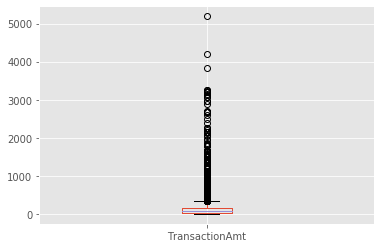

In [130]:
df_fraud.boxplot('TransactionAmt')

In [131]:
# df_fraud[df_fraud.TransactionAmt < 1000]['TransactionAmt'].hist()
# df_fraud[df_fraud.TransactionAmt < 1000]['ProductCD'].hist()
df_fraud.ProductCD.value_counts(), df.ProductCD.value_counts()

(W    8969
 C    8008
 H    1574
 R    1426
 S     686
 Name: ProductCD, dtype: int64, W    439670
 C     68519
 R     37699
 H     33024
 S     11628
 Name: ProductCD, dtype: int64)

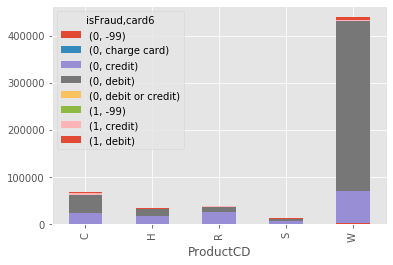

In [132]:
ct = pd.crosstab(df['ProductCD'], [df['isFraud'], df['card6']])
ct.plot(kind='bar', stacked=True)

In [133]:
df['isFraud'].as_matrix()

# df.drop('isFraud')
df.columns

/work/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


Index(['TransactionID', 'isFraud', 'TransactionDT', 'TransactionAmt',
       'ProductCD', 'card1', 'card2', 'card3', 'card4', 'card5',
       ...
       'V330', 'V331', 'V332', 'V333', 'V334', 'V335', 'V336', 'V337', 'V338',
       'V339'],
      dtype='object', length=394)

In [206]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import StratifiedShuffleSplit

splitter = StratifiedShuffleSplit(n_splits=1, test_size=.5)

In [135]:
# !pip install category_encoders

In [136]:
target = 'isFraud'
features = df.columns.to_list()
features.remove(target)
# cat_features = df[features].select_dtypes(include=['category'])
cat_features = df[features].select_dtypes(include=['category'])
# for f in cat_features:
  # print(dir(df[f].cat))
#     print(df[f].cat.categories)
#     if '-99' not in df[f].cat.categories:
#         df[f].cat.add_categories('-99', inplace=True)
#     df[f].fillna('-99', inplace=True)
# df[set(features) - set(cat_features)].fillna(-99, inplace=True)
# cat_features = 



In [218]:
X = df.loc[:, features]
y = df.loc[:, target]


# X,y
# features, target
for train_index, test_index in splitter.split(X, y):
    print(test_index.shape, train_index.shape)
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
# X_train

(295270,) (295270,)


In [ ]:
print(f'Features are {features}')
# X_train.head()

In [139]:
# BinaryEncoder().fit_transform(X=X_train[cats], y=y_train)

In [221]:
from category_encoders import BinaryEncoder, BackwardDifferenceEncoder, HashingEncoder, CatBoostEncoder, OneHotEncoder

cols = df.columns.values
cats = ['ProductCD'] + [x for x in cols if (x.startswith(('card', 'M', 'addr')) or 'emaildomain' in x)]  

print(cats)
'''
1. ProductCD
2. card1 - card6
3. addr1, addr2
4. Pemaildomain Remaildomain
5. M1 - M9
'''

len(cols), len(cats)

from sklearn.preprocessing import StandardScaler
def encode_cats(X_train, cats=cats, encoder=None, y_train=None,):
#     X_train_ = X_train#.drop(columns=cats)
#     scaler = StandardScaler()
#     X_num = scaler.fit_transform(X_train[set(features)- set(cats)])
#     nums = list(set(features)-set(cats))
    nums = X_train._get_numeric_data().columns
    print(nums)
#     for num in nums:
    X_train[nums] -= X_train[nums].mean()
    X_train[nums] /= X_train[nums].std()

# BinaryEncoder()
# CatBoostEncoder()
#     encoder = BinaryEncoder(cols=cats )
    if not encoder:
        encoder = BinaryEncoder()
        encoder.fit(X_train[cats], y_train)
    X_train_cats = encoder.transform(X_train[cats])
    df_t = pd.concat([X_train.drop(cats, axis=1), X_train_cats], axis=1)
    return df_t.fillna(-99), encoder

df_t, enc = encode_cats(X_train, cats, None, y_train)
df_t

['ProductCD', 'card1', 'card2', 'card3', 'card4', 'card5', 'card6', 'addr1', 'addr2', 'P_emaildomain', 'R_emaildomain', 'M1', 'M2', 'M3', 'M4', 'M5', 'M6', 'M7', 'M8', 'M9']
Index(['TransactionID', 'TransactionDT', 'TransactionAmt', 'card1', 'card2',
       'card3', 'card5', 'addr1', 'addr2', 'dist1',
       ...
       'V330', 'V331', 'V332', 'V333', 'V334', 'V335', 'V336', 'V337', 'V338',
       'V339'],
      dtype='object', length=379)


/work/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


,TransactionID,TransactionDT,TransactionAmt,dist1,dist2,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,D1,D2,D3,D4,D5,D6,...,M1_2,M2_0,M2_1,M2_2,M3_0,M3_1,M3_2,M4_0,M4_1,M4_2,M5_0,M5_1,M5_2,M6_0,M6_1,M6_2,M7_0,M7_1,M7_2,M8_0,M8_1,M8_2,M9_0,M9_1,M9_2
538526,1.427305,1.478046,-0.434095,-0.339111,-0.133527,-0.097346,-0.091633,-0.036903,-0.044560,-0.215993,-0.112341,-0.029655,-0.043092,-0.268677,-0.043967,-0.097309,-0.035155,-0.243344,-0.146697,-0.596685,-0.759321,-0.900059,-0.368266,-0.718909,1.036505,...,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1
138898,-0.917439,-0.982536,-0.109374,-0.339111,-0.133527,-0.089899,-0.085200,-0.036903,-0.059047,-0.177239,-0.112341,-0.045758,-0.053528,-0.148722,-0.054395,-0.086747,-0.046622,-0.197041,-0.146697,0.459562,0.669812,0.753005,0.491447,0.800881,-0.278053,...,1,0,0,1,0,0,1,0,1,0,0,0,1,0,1,0,0,0,1,0,0,1,0,0,1
98450,-1.154760,-1.166897,-0.141903,-0.339111,-0.133527,-0.097346,-0.091633,-0.036903,-0.044560,-0.215993,-0.112341,-0.045758,-0.043092,-0.268677,-0.043967,-0.097309,-0.046622,-0.243344,-0.146697,-0.596685,-0.759321,-0.900059,-0.877916,-0.718909,-0.278053,...,1,0,0,1,0,0,1,0,1,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1
482889,1.100865,1.125267,-0.142107,-0.339111,-0.133527,-0.089899,-0.085200,-0.036903,-0.059047,-0.177239,-0.112341,-0.045758,-0.053528,-0.208699,-0.054395,-0.097309,-0.046622,-0.235627,-0.126539,-0.596685,-0.759321,-0.900059,-0.368266,0.340663,-0.278053,...,0,0,1,0,0,1,0,0,1,0,0,0,1,0,1,1,0,1,0,0,1,0,0,1,0
425837,0.766123,0.737239,-0.299009,-0.339111,-0.133527,-0.097346,-0.085200,-0.036903,-0.044560,-0.215993,-0.112341,-0.029655,-0.053528,-0.268677,-0.033538,-0.086747,-0.023689,-0.235627,-0.146697,0.813752,0.970682,3.194453,0.779734,2.727376,3.997581,...,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
566140,1.589325,1.655193,-0.141903,-0.339111,-0.133527,-0.097346,-0.091633,-0.036903,-0.044560,-0.215993,-0.112341,-0.045758,-0.043092,-0.268677,-0.043967,-0.097309,-0.046622,-0.251061,-0.166855,-0.596685,-0.759321,-0.900059,-0.877916,-0.718909,-0.278053,...,1,0,0,1,0,0,1,0,1,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1
303269,0.046978,0.028772,-0.342393,0.078411,-0.133527,-0.097346,-0.091633,-0.036903,-0.059047,-0.215993,-0.112341,-0.045758,-0.053528,-0.208699,-0.054395,-0.097309,-0.046622,-0.243344,-0.146697,-0.596685,-0.759321,-0.900059,-0.368266,-0.718909,-0.278053,...,0,0,1,0,0,1,0,0,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,1,0
399481,0.611484,0.587406,5.970807,-0.339111,-0.133527,-0.097346,-0.091633,-0.036903,-0.059047,-0.177239,-0.098387,-0.045758,-0.053528,-0.208699,-0.054395,-0.097309,-0.046622,-0.243344,-0.146697,-0.596685,-0.759321,0.358813,-0.368266,-0.718909,-0.278053,...,0,0,1,0,0,1,0,0,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0
518328,1.308797,1.344358,-0.109374,-0.339111,-0.133527,-0.089899,-0.078767,-0.036903,-0.059047,-0.138484,-0.112341,-0.045758,-0.053528,-0.148722,-0.054395,-0.097309,-0.046622,-0.227909,-0.146697,-0.558736,-0.195190,0.435108,-0.337378,0.404880,-0.278053,...,0,0,1,1,0,1,1,0,1,0,0,0,1,0,1,1,0,1,0,0,1,0,0,1,1


In [223]:
# df_t[df_t.loc[:, df_t.apply(lambda x: x.isnull().any())].columns]
# cats

In [224]:
X_train._get_numeric_data().columns

Index(['TransactionID', 'TransactionDT', 'TransactionAmt', 'card1', 'card2',
       'card3', 'card5', 'addr1', 'addr2', 'dist1',
       ...
       'V330', 'V331', 'V332', 'V333', 'V334', 'V335', 'V336', 'V337', 'V338',
       'V339'],
      dtype='object', length=379)

In [144]:
# X_train.loc[:, X_train.apply(lambda row: row.astype(str).str.contains('charter').any())]

In [225]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
# clf = LogisticRegression()
clf = LogisticRegression()
df_, enc = encode_cats(X_train, cats, None, y_train)
clf.fit(df_, y_train)
# score = clf.score(X_test, y_test.to_matrix())
# X_train._get_numeric_data()

Index(['TransactionID', 'TransactionDT', 'TransactionAmt', 'card1', 'card2',
       'card3', 'card5', 'addr1', 'addr2', 'dist1',
       ...
       'V330', 'V331', 'V332', 'V333', 'V334', 'V335', 'V336', 'V337', 'V338',
       'V339'],
      dtype='object', length=379)


/work/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/work/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [212]:
# set(df_t.columns) - set(df_t._get_numeric_data().columns)
df_t.select_dtypes(include=np.number)

,TransactionID,TransactionDT,TransactionAmt,dist1,dist2,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,D1,D2,D3,D4,D5,D6,...,M2_1,M2_2,M2_3,M3_1,M3_2,M3_3,M4_1,M4_2,M4_3,M4_4,M5_1,M5_2,M5_3,M6_1,M6_2,M6_3,M7_1,M7_2,M7_3,M8_1,M8_2,M8_3,M9_1,M9_2,M9_3
561,0.239620,0.025653,0.396199,0.324612,-0.223458,-0.072673,-0.195057,-0.089713,-0.174575,-0.209620,-0.215497,-0.123990,-0.205688,-0.061173,-0.197640,-0.160012,-0.300492,-0.238987,-0.166261,-0.570219,-0.724824,-0.803922,1.118029,0.958159,-0.340602,...,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0
865,1.297362,1.455186,0.184529,-0.340619,-0.223458,-0.147210,-0.151998,-0.089713,-0.174575,-0.209620,-0.215497,-0.123990,-0.205688,-0.182789,-0.197640,-0.212303,-0.300492,-0.249933,-0.213147,-0.570219,-0.724824,-0.803922,2.014685,0.673601,-0.340602,...,0,1,0,0,1,0,1,0,0,0,0,1,0,0,1,0,1,0,0,1,0,0,1,0,0
602,0.382276,0.120927,-0.376111,-0.340619,-0.223458,-0.221747,-0.195057,-0.089713,0.257541,-0.209620,-0.269183,-0.123990,0.133731,-0.243598,0.097345,-0.212303,-0.300492,-0.260880,-0.260034,-0.570219,-0.724824,-0.803922,-0.908919,-0.697452,-0.340602,...,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0
125,-1.277404,-1.083828,-0.318903,-0.340619,-0.223458,-0.221747,-0.238115,-0.089713,-0.174575,-0.209620,-0.215497,-0.123990,0.133731,-0.243598,0.097345,-0.212303,-0.300492,-0.249933,-0.213147,-0.570219,-0.724824,-0.803922,-0.908919,-0.697452,-0.340602,...,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0
387,-0.365798,-0.499493,-0.347507,-0.340619,-0.223458,-0.221747,-0.238115,-0.089713,-0.174575,-0.209620,-0.215497,-0.123990,0.133731,-0.243598,0.097345,-0.212303,-0.300492,-0.249933,-0.213147,-0.570219,-0.724824,-0.803922,-0.908919,-0.697452,-0.340602,...,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73,-1.458334,-1.197500,1.122743,0.199881,-0.223458,-0.221747,-0.238115,-0.089713,-0.174575,-0.209620,-0.215497,-0.123990,-0.205688,-0.182789,-0.197640,-0.212303,-0.300492,-0.249933,-0.213147,-0.530636,-0.050352,0.468798,-0.252213,0.647732,-0.340602,...,1,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,1,0,0,1,0,0,1,0,0
997,1.756645,2.273426,-0.358949,-0.340619,-0.223458,-0.109942,-0.195057,-0.089713,-0.174575,-0.156525,-0.161810,-0.123990,-0.205688,-0.182789,-0.197640,-0.212303,-0.300492,0.023732,-0.072487,-0.332720,0.111781,0.468798,-0.908919,-0.697452,-0.340602,...,0,1,0,0,1,0,0,1,0,0,0,0,1,0,1,0,1,0,0,1,0,0,1,0,0
379,-0.393633,-0.508193,0.138619,0.293429,-0.223458,-0.221747,-0.238115,-0.089713,-0.174575,-0.156525,-0.215497,-0.123990,-0.205688,-0.182789,-0.197640,-0.212303,-0.300492,-0.249933,-0.213147,-0.570219,-0.724824,-0.803922,-0.283785,-0.697452,-0.340602,...,1,0,0,1,0,0,0,1,0,0,0,0,1,0,1,0,1,0,0,1,0,0,1,0,0
504,0.041294,-0.177302,-0.318903,-0.340619,-0.223458,-0.221747,-0.238115,-0.089713,-0.174575,-0.209620,-0.215497,-0.123990,0.133731,-0.243598,0.097345,-0.212303,-0.300492,-0.249933,-0.213147,-0.570219,-0.724824,-0.803922,-0.908919,-0.697452,-0.340602,...,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0


In [183]:
enc.category_mapping

[{'col': 'ProductCD', 'mapping': W      1
  C      2
  H      3
  R      4
  S      5
  NaN   -2
  dtype: int64, 'data_type': dtype('O')},
 {'col': 'card4', 'mapping': visa                1
  mastercard          2
  american express    3
  discover            4
  NaN                -2
  dtype: int64, 'data_type': dtype('O')},
 {'col': 'card6', 'mapping': credit    1
  debit     2
  NaN      -2
  dtype: int64, 'data_type': dtype('O')},
 {'col': 'P_emaildomain', 'mapping': yahoo.com            1
  -99                  2
  outlook.com          3
  icloud.com           4
  gmail.com            5
  hotmail.com          6
  aol.com              7
  anonymous.com        8
  comcast.net          9
  msn.com             10
  yahoo.com.mx        11
  hotmail.es          12
  cfl.rr.com          13
  me.com              14
  charter.net         15
  optonline.net       16
  roadrunner.com      17
  sbcglobal.net       18
  q.com               19
  verizon.net         20
  bellsouth.net       21
 

In [226]:
# all(X_train.columns ==  X_test.columns)
test, enc = encode_cats(X_test, cats, enc)
# set(df_t.columns) - set(test.columns) 
# df_t.columns
# test = encode_cats(X_train, cats)
# test.columns

Index(['TransactionID', 'TransactionDT', 'TransactionAmt', 'card1', 'card2',
       'card3', 'card5', 'addr1', 'addr2', 'dist1',
       ...
       'V330', 'V331', 'V332', 'V333', 'V334', 'V335', 'V336', 'V337', 'V338',
       'V339'],
      dtype='object', length=379)


/work/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [229]:
preds = clf.predict(test)
print(classification_report(y_test, preds))
print(confusion_matrix(y_test, preds))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98    284938
           1       0.79      0.17      0.28     10332

    accuracy                           0.97    295270
   macro avg       0.88      0.59      0.63    295270
weighted avg       0.96      0.97      0.96    295270

[[284465    473]
 [  8553   1779]]


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0])

In [ ]:
# !pip install category_encoders
from category_encoders import CatBoostEncoder

def run_model(model):
  model

# New Section